# W4D2: Model Fitting and Evaluating

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Check if there are highly correlated features and drop them if there are any.

In [6]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

<AxesSubplot:>

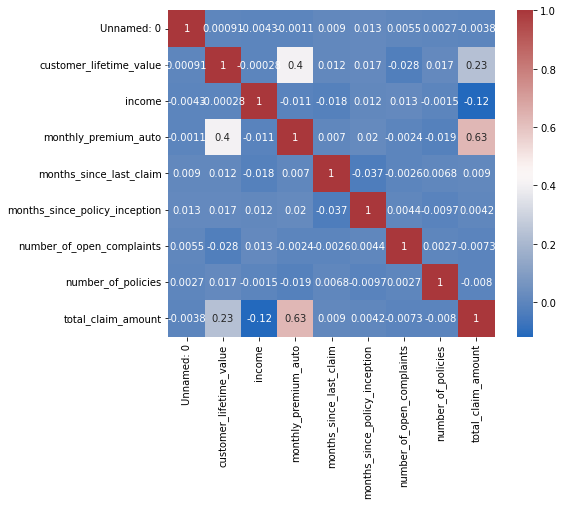

In [7]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

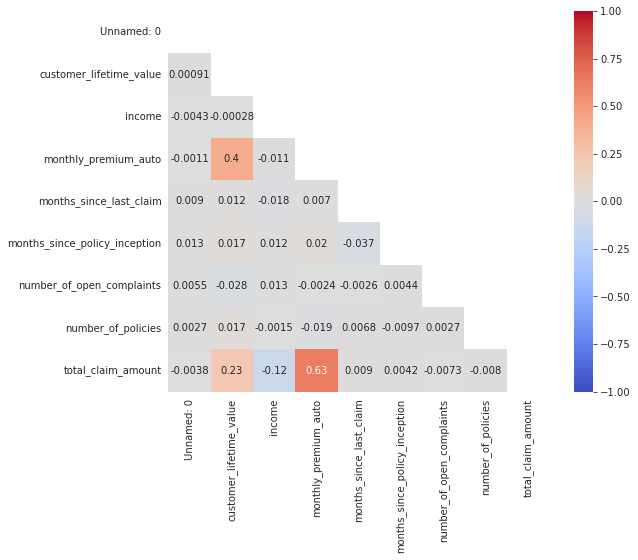

In [8]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [9]:
#One Hot/Label Encoding of the categorical variables in the categoricals data frame 
#that you created in Activity 4. 
#(Hint: check Dropfirst option)

In [10]:
df=pd.get_dummies(df, drop_first=True)
df.head(5)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,0,1,0,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,1,0,0,0,0,1,0,1,0
3,3,22332,49078,97,10,3,0,2,484,0,...,1,0,0,0,0,0,0,0,1,0
4,4,9025,23675,117,15,31,1,7,707,0,...,1,0,0,0,0,0,0,0,1,0


In [11]:
#for the first iteration, we will focus on the  numericals data (numericals data frame) as our data source.

In [12]:
df_num = df.iloc[:,1:].select_dtypes(np.number)
df_cat = df.select_dtypes(object)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [13]:
#(optional)  remove the outliers from the numerical columns.

In [14]:
pd.cut(df_num['total_claim_amount'],10)

0          (289.3, 578.6]
1          (578.6, 867.9]
2          (289.3, 578.6]
3          (289.3, 578.6]
4          (578.6, 867.9]
               ...       
10684    (1157.2, 1446.5]
10685     (-2.893, 289.3]
10686      (289.3, 578.6]
10687      (578.6, 867.9]
10688     (867.9, 1157.2]
Name: total_claim_amount, Length: 10689, dtype: category
Categories (10, interval[float64, right]): [(-2.893, 289.3] < (289.3, 578.6] < (578.6, 867.9] < (867.9, 1157.2] ... (1735.8, 2025.1] < (2025.1, 2314.4] < (2314.4, 2603.7] < (2603.7, 2893.0]]

In [15]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [16]:
df_num['total_claim_amount']
removed_outliers = df_num['total_claim_amount'].between(df_num['total_claim_amount'].quantile(.05), 
                                                        df_num['total_claim_amount'].quantile(.95))
removed_outliers

0         True
1         True
2         True
3         True
4         True
         ...  
10684    False
10685     True
10686     True
10687     True
10688    False
Name: total_claim_amount, Length: 10689, dtype: bool

In [17]:
df_num_clean=df_num.loc[removed_outliers]

In [18]:
df_num_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,2771,59855,74,30,82,4,1,355,0,0,...,1,0,0,0,0,0,0,1,1,0
10683,19228,56544,187,14,32,0,2,897,0,0,...,1,0,0,0,1,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0


In [19]:
###X-y split (y is the target variable which  is the total claim amount)
x=df_num.drop('total_claim_amount', axis=1)
y=df_num.total_claim_amount
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [20]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6800609d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa680060fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6800606d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6ac4c2550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6ac4c2820>],
 'means': []}

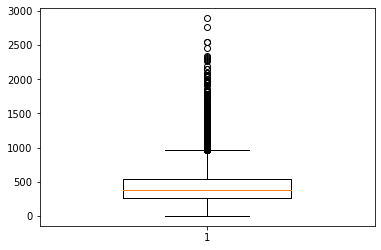

In [21]:
plt.boxplot(df_num['total_claim_amount'], widths=.5)

# W4D3 Linear Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

**1.Linear Regression. Train-test split.**

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)
x_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
4665,5205,28439,72,18,91,0,9,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4072,2790,28786,71,30,69,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4549,11981,21514,62,0,59,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4211,5872,77156,73,30,39,0,7,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3081,9403,56410,117,13,73,0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,22658,23665,67,19,50,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1667,8930,65263,82,25,63,0,2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1516,2522,67185,73,24,15,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
10215,5096,27940,65,21,3,1,4,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [24]:
x_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
6608,7271,20545,70,23,86,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
5697,5079,17922,68,6,95,0,5,0,1,0,...,0,0,0,0,0,0,0,1,0,1
10524,4428,58577,110,6,62,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
397,22332,49078,97,10,3,0,2,0,0,1,...,1,0,0,0,0,0,1,0,0,1
6324,2430,67280,70,29,30,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
7763,5658,78834,72,14,20,2,8,0,1,0,...,0,1,0,0,0,0,0,1,0,1
5218,2434,23033,62,5,9,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1346,23594,76358,66,25,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [26]:
y_train

6608     336
5697     326
10524    303
397      484
6324     341
        ... 
9785      53
7763     345
5218     500
1346      86
3582     680
Name: total_claim_amount, Length: 7482, dtype: int64

In [27]:
df_num_clean = df_num_clean.iloc[:,1:].select_dtypes(np.number)
df_num_clean

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,48029,61,7,52,0,9,292,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,26794,64,3,26,0,1,744,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,22139,100,34,31,0,2,480,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,49078,97,10,3,0,2,484,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,23675,117,15,31,1,7,707,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,59855,74,30,82,4,1,355,0,0,0,...,1,0,0,0,0,0,0,1,1,0
10683,56544,187,14,32,0,2,897,0,0,0,...,1,0,0,0,1,0,0,0,1,0
10685,61146,65,7,68,0,6,273,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,39837,201,11,63,0,2,381,0,0,0,...,0,0,1,0,1,0,0,0,1,0


**2.Standardize the data**

In [28]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

In [29]:
x_train_scaled

array([[-0.11021627, -1.2632667 , -0.67143823, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.42794064, -1.36853038, -0.72925469, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [-0.5223013 ,  0.26299646,  0.48489091, ..., -0.51220962,
         0.65494534, -0.48945135],
       ...,
       [-0.81132612, -1.16342071, -0.90270406, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [ 2.25575772,  0.97656622, -0.78707115, ..., -0.51220962,
         0.65494534, -0.48945135],
       [ 1.18923585, -0.01438919, -0.55580532, ..., -0.51220962,
         0.65494534, -0.48945135]])

In [30]:
x_train.shape

(7482, 108)

In [31]:
x_test_scaled=std_scaler.transform(x_test)

In [32]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-0.11021627 -1.2632667  -0.67143823 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42794064 -1.36853038 -0.72925469 ...  1.95232568 -1.52684497
   2.04310398]
 [-0.5223013   0.26299646  0.48489091 ... -0.51220962  0.65494534
  -0.48945135]
 ...
 [-0.81132612 -1.16342071 -0.90270406 ...  1.95232568 -1.52684497
   2.04310398]
 [ 2.25575772  0.97656622 -0.78707115 ... -0.51220962  0.65494534
  -0.48945135]
 [ 1.18923585 -0.01438919 -0.55580532 ... -0.51220962  0.65494534
  -0.48945135]]
--------
[[-0.40967729 -0.94647238 -0.61362178 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.7597249  -0.93254692 -0.64253    ... -0.51220962  0.65494534
  -0.48945135]
 [ 0.57248529 -1.22437973 -0.90270406 ...  1.95232568  0.65494534
  -0.48945135]
 ...
 [-0.79857077  0.60844433 -0.58471355 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42547654 -0.96649777 -0.81597938 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.49881985 -0.94988352  0.71615674 ...  1.95232568 -1.52684497
  -0.48945135]]


**3.Apply Linear Regression**

In [33]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

In [34]:
x_test_const_scaled = sm.add_constant(x_train_scaled)

In [35]:
model = sm.OLS(y_train, x_train_const_scaled).fit()  #OLS = Ordinary least square method
predictions_train = model.predict(x_train_const_scaled)

In [36]:
x_test_const_scaled = sm.add_constant(x_test_scaled) #adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)
print_model.tables[0]

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     239.0
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:58:08   Log-Likelihood:                -47599.
No. Observations:                7482   AIC:                         9.541e+04
Df Residuals:                    7376   BIC:                         9.614e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.632    265.345      0.0

Dep. Variable:,total_claim_amount,R-squared:,0.773
Model:,OLS,Adj. R-squared:,0.770
Method:,Least Squares,F-statistic:,239.0
Date:,"Mon, 11 Jul 2022",Prob (F-statistic):,0.00
Time:,15:58:08,Log-Likelihood:,-47599.
No. Observations:,7482,AIC:,9.541e+04
Df Residuals:,7376,BIC:,9.614e+04
Df Model:,105,,
Covariance Type:,nonrobust,,


In [37]:
predictions_test

array([452.21340455, 394.58564351, 138.85126203, ..., 579.24489257,
       -32.40173853, 480.1344889 ])

In [38]:
print(model.rsquared_adj)

0.7696357753043289


**4.Model Interpretation.**

Text(0.5, 1.0, 'x_train_scaled')

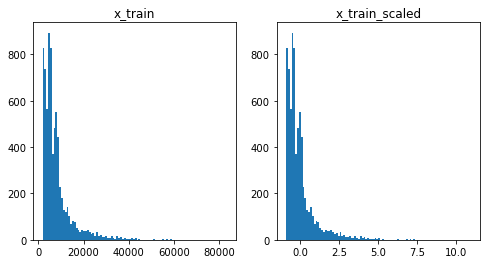

In [39]:
#plot x train and x train scaled
fig, ax = plt.subplots(1,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(x_train.iloc[:,0], bins = 100)
plt.title('x_train')
plt.subplot(1,2,2)
plt.hist(x_train_scaled[:,0], bins = 100)
plt.title('x_train_scaled')



In [40]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)  

LinearRegression()

In [41]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [42]:
y_pred=model.predict(x_test_scaled) #making predictions

In [43]:
y_pred

array([454.60194955, 383.43271126, 138.75712343, ..., 575.974326  ,
       -29.62050012, 470.05798811])

Text(0.5, 1.0, 'Test Set -Predicted vs real')

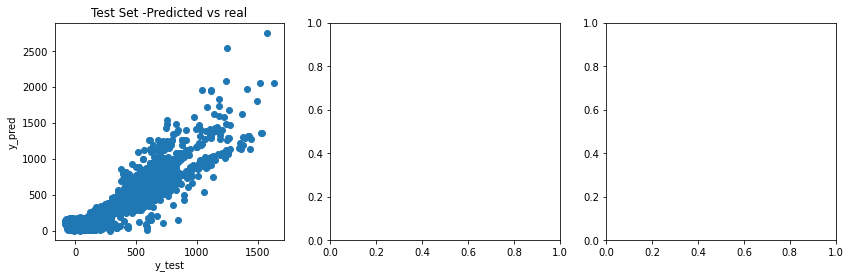

In [44]:
#make a scatter plot

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

In [45]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
print(result)

       y_test      y_pred
4665      345  454.601950
4072      345  383.432711
4549      257  138.757123
4211      445  403.759300
3081      523  436.145653
...       ...         ...
3488      404  331.277537
1667      554  532.622346
1516      350  575.974326
10215      27  -29.620500
2931      320  470.057988

[3207 rows x 2 columns]


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

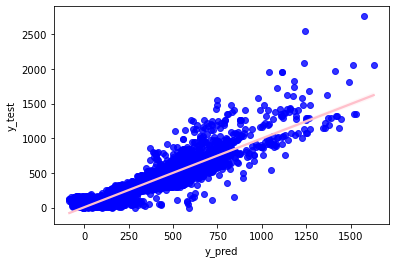

In [46]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "pink"}) 

# W3D4 Model Validation

## Model Evaluation

In [47]:
#MSE = MEAN SQUARED ERROR

In [48]:
print(mse(y_test,y_pred))

19176.016090637066


In [49]:
#MAE = MEAN ABSOLUTE ERROR

In [50]:
print(mae(y_test,y_pred))

95.91816821175627


In [51]:
#RMSE = Root mean square error

In [52]:
rms = np.sqrt(mse(y_test, y_pred))
print(rms)

138.47749308330603


In [53]:
#(coefficient of determination) regression score function.

R2=r2_score(y_test,y_pred)
R2

0.7701131633774758

In [54]:
removed_outliers

0         True
1         True
2         True
3         True
4         True
         ...  
10684    False
10685     True
10686     True
10687     True
10688    False
Name: total_claim_amount, Length: 10689, dtype: bool

In [55]:
#Adjusted R2.
x_test.shape[1]

108

In [56]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.7620990322105189

## Feature Importance.

In [57]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [58]:
features_importances

,Attribute,Importance
75,month_jan,1.880878e+15
91,policy_personal l3,1.446571e+15
86,policy_type_special auto,1.411588e+15
85,policy_type_personal auto,1.302311e+15
90,policy_personal l2,1.253472e+15
...,...,...
88,policy_corporate l3,1.536338e-01
83,marital_status_married,1.051763e-01
105,vehicle_class_two-door car,7.124581e-02
4,months_since_policy_inception,4.109042e-02


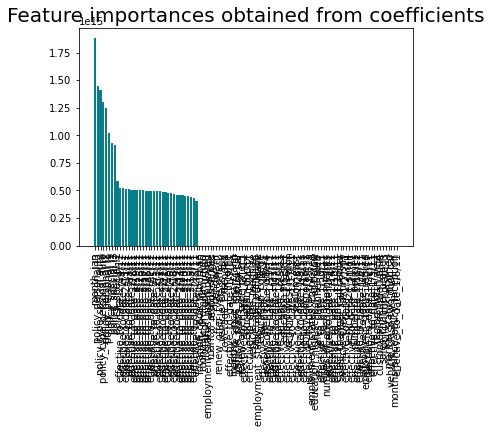

In [59]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# W7D1 Comparing regression models

## Fit the models LinearRegressor, Lasso, Ridge and compare the model performances.